### Homework Assignment 4
### Rania Siddiqui 07494
### rs07494@st.habib.edu.pk

In [4]:
import pymysql
import pandas as pd
import psycopg2
import pandas.io.sql as psql

In [6]:
connection = pymysql.connect(
    host='localhost',        # e.g., 'localhost'
    user='root',    # e.g., 'root'
    password='root1234',# your MySQL password
    database='sakila' # the database that contains the tables
)

In [8]:
# create a cursor
cur = connection.cursor()

# execute a statement
print('Mysql database version:')
cur.execute('SELECT version()')

# display the PostgreSQL database server version
db_version = cur.fetchone()
print(db_version)

Mysql database version:
('8.0.39',)


#### Reading the database into dataframe

In [11]:
df = psql.read_sql('SELECT * FROM countries', connection)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10440\1945676083.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = psql.read_sql('SELECT * FROM countries', connection)


In [13]:
df.head()

,fact_id,country_code,country_name,country_region,country_sub_region,country_area,country_area_land,country_area_water,country_population,country_population_growth,country_birth_rate,country_death_rate,country_migration_rate
0,1,af,Afghanistan,Asia,Southern Asia,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,Europe,Southern Europe,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,Africa,Northern Africa,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,Europe,Southern Europe,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,Africa,Sub-Saharan Africa,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [15]:
df2 = psql.read_sql('SELECT * FROM cities', connection)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10440\1478697900.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = psql.read_sql('SELECT * FROM cities', connection)


In [17]:
df2.head()

,city_id,city_name,city_population,capital,fact_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


In [19]:
connection.close()

### EDA

### Generating visualizations for univariate anyalysis

In [23]:
import matplotlib.pyplot as plt

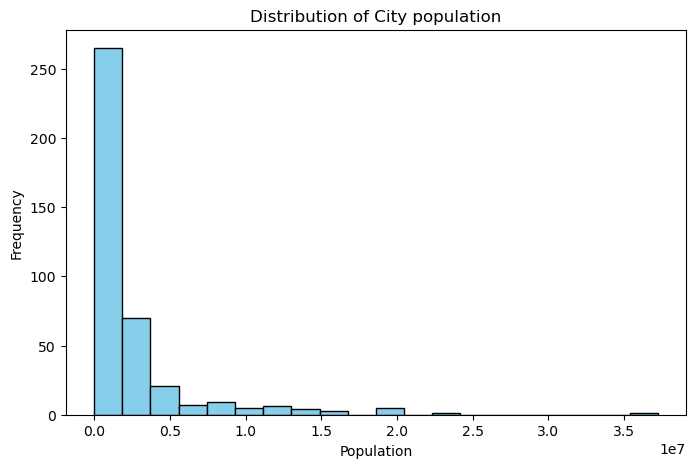

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(df2['city_population'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of City population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

##### The distribution is right-skewed, meaning most cities have relatively smaller populations, while a few cities have much larger populations. The bulk of the data is concentrated towards the lower end of the population scale, with fewer cities having extremely large populations.

##### The highest bars are towards the left of the histogram, indicating that a significant number of cities have populations on the lower end, possibly under 500,000 people. This suggests a large number of smaller cities compared to larger ones.

##### There may be some potential outliers or exceptionally large cities toward the right end of the graph where the population count is very high, with relatively few cities falling into this range.

##### The range of population values is wide, stretching from smaller towns to potentially metropolitan areas, showing high variability in the city sizes.

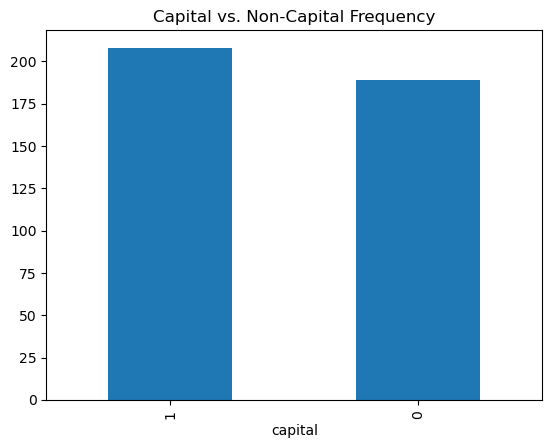

In [40]:
plot = df2['capital'].value_counts().plot(kind='bar', title="Capital vs. Non-Capital Frequency")

##### The above bar chart shows that the frequency of capital v/s non capital fequency is almost the same. This shows that there is a variation in the dataset. There are almost equal number of cities that are capital and non capital.

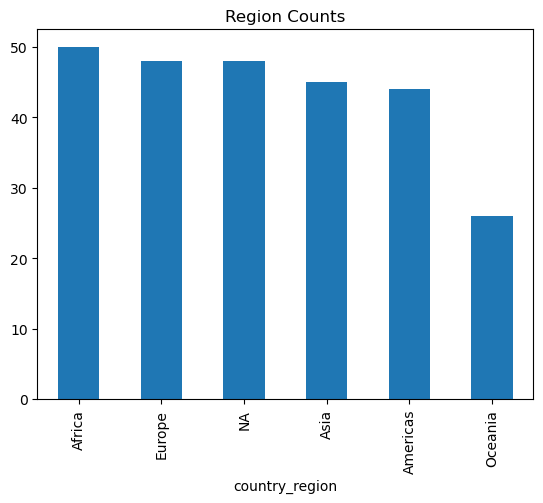

In [28]:
plot = df['country_region'].value_counts().plot(kind='bar', title="Region Counts")

##### Even distribution: Aside from Oceania, the other regions have relatively similar counts, indicating a balanced dataset for most regions.

##### Oceania's underrepresentation: The clear gap between Oceania and the other regions could point to either a genuine lack of data from this region or a bias in data collection.

##### Potential for further investigation: If this data represents countries or populations, the disparity in counts could be meaningful for understanding regional representation or global trends.

<Axes: title={'center': 'Country Birth Rate v/s Population growth'}, xlabel='country_birth_rate', ylabel='country_population_growth'>

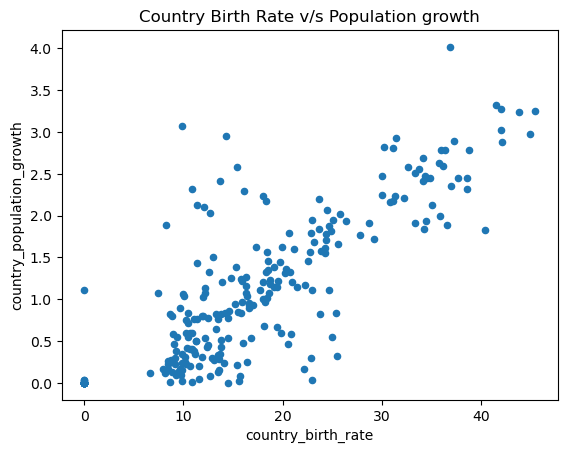

In [86]:
df.plot.scatter(x='country_birth_rate', y='country_population_growth', title='Country Birth Rate v/s Population growth')

##### There is a clear positive correlation between birth rate and population growth. As the birth rate increases, the population growth tends to increase as well. This is expected since higher birth rates contribute directly to an increase in population, assuming other factors like death rate and migration remain relatively stable..

##### Lower Birth Rate (0-20): Countries with lower birth rates (below 20 births per 1,000 people) show a wide range of population growth rates, typically between 0% and 2%. This suggests that in countries with lower birth rates, population growth is influenced by other factors such as migration or lower death rates.

##### Higher Birth Rate (20-40): As birth rates increase beyond 20, there is a more consistent upward trend in population growth. Countries with birth rates between 20 and 40 per 1,000 generally experience population growth rates above 1%, with some reaching above 3.5%.

##### Outliers: Some countries with extremely high populations (e.g., China or India) likely appear at the far right of the chart, showing that even countries with smaller land areas can support a large population due to factors like urbanization and resource management.

##### The scatter plot reinforces the expected relationship between birth rate and population growth, showing that higher birth rates generally lead to higher population growth. However, the variability in population growth at lower birth rates suggests that other demographic factors (such as migration and death rates) play a role in shaping population dynamics in these regions.

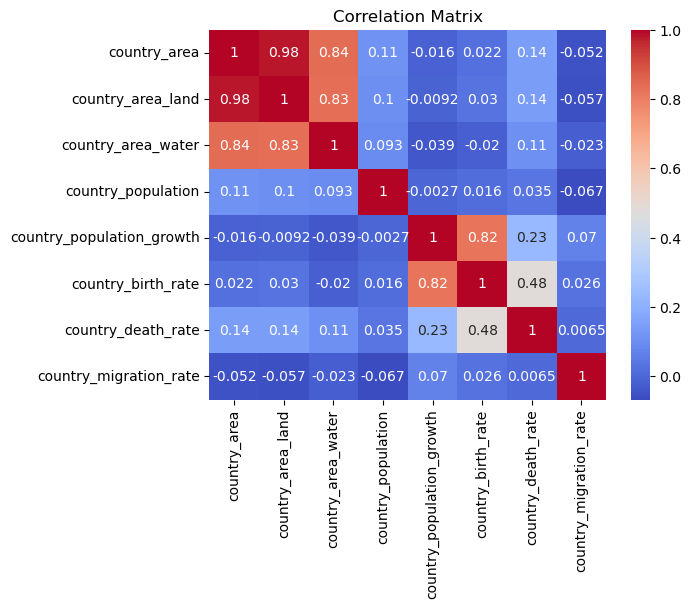

In [74]:
import seaborn as sns  
corr = df[['country_area', 'country_area_land', 'country_area_water', 'country_population', 'country_population_growth', 'country_birth_rate', 'country_death_rate', 'country_migration_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Below are some of the insights from the above co-relation plot
##### Birth Rate vs. Population Growth: The correlation between the birth rate and population growth rate is quite strong. This makes sense, as countries with higher birth rates often experience faster population growth.

##### Death Rate vs. Population Growth: There's a weak correlation between death rate and population growth. As death rates rise, population growth tends to decrease, which is expected due to higher mortality reducing population expansion.

##### Country Area and Population: As seen in the scatter plot, the correlation between country area and population is weak. Larger countries don't necessarily have larger populations, reflecting the scatter plot analysis.

##### Migration Rate: Migration rate seems to have little correlation with most other variables, suggesting that factors influencing migration (like politics or economic conditions) may not be directly tied to population size, area, or other factors in the dataset.

capital                 0          1
country_region                      
Africa           55674000   77065000
Americas        141456000   87971000
Asia            249162000  178054000
Europe           62773100   69995000
NA               22541000   29981000
Oceania          14867000    2146000


<Figure size 1200x800 with 0 Axes>

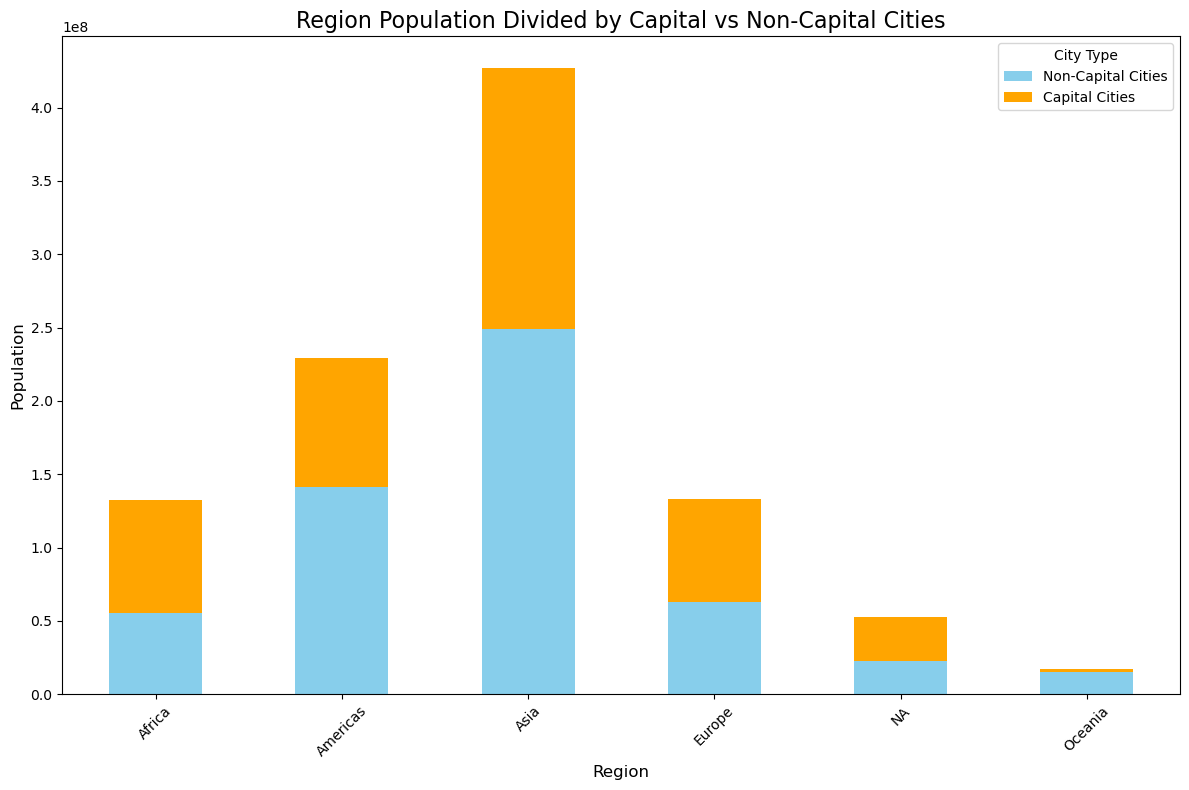

In [31]:
df_merged = pd.merge(df, df2, on='fact_id')


region_population = df_merged.groupby(['country_region', 'capital'])['city_population'].sum().unstack(fill_value=0)
print(region_population)
plt.figure(figsize=(12, 8))
region_population.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(12, 8))


plt.title('Region Population Divided by Capital vs Non-Capital Cities', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Population', fontsize=12)

# Add legend
plt.legend(['Non-Capital Cities', 'Capital Cities'], title='City Type')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Across most regions, the population in non-capital cities tends to be higher than in capital cities, except for a few like Asia and Europe where both categories are close in value.
